In [2]:
import numpy as np
import matplotlib.pyplot as plt

c   = 0.68  
dH  = 1.5e5  
dHp = 1.5e4  
dS  = 476.46  
r   = 1.99  

In [3]:
class fluxCO2:
    
    def __init__(self, c=0.68, dH=1.5e5, dHp=1.5e4, dS=476.46, r=1.99):
    
        self.c   = c
        self.dH  = dH
        self.dHp = dHp
        self.dS  = dS
        self.r   = r
        
        #self.F   = F # Energy density available to life. To be varied around 30 W/m^2.
        #self.T   = T # Surface temperature
        
    def getFlux(self,T,F):
        
        T += 273.15 #Convert T to Kelvins
    
        num = self.c*F*T*np.exp(-self.dHp/(self.r*T))
        den = 1+np.exp(
                          (self.dS/self.r) - (self.dH/(self.r*T))
                                                )
        flux = num/den
        
        return flux
        

In [4]:
f = fluxCO2()

In [5]:
f.getFlux(T=30, F=30)

9.8334891457256259e-08

In [12]:
temps     = np.linspace(-30,80)
densities = np.linspace(25,35)
#print(temps)
#print(densities)

In [10]:
def mapFluxes(temps, densities):
    
    print(np.shape(temps))
    print(np.shape(densities))
    
    fluxes =  np.ones([np.size(temps), np.size(densities)])
    print(np.shape(fluxes))
    for i in range(0,np.size(temps)):
        for j in range(0,np.size(densities)):
            fluxes[i,j] = f.getFlux(temps[i],densities[j])
            
    return fluxes

fluxes = mapFluxes(temps, densities)


(50,)
(50,)
(50, 50)


(50,)
(50,)
(50, 50)


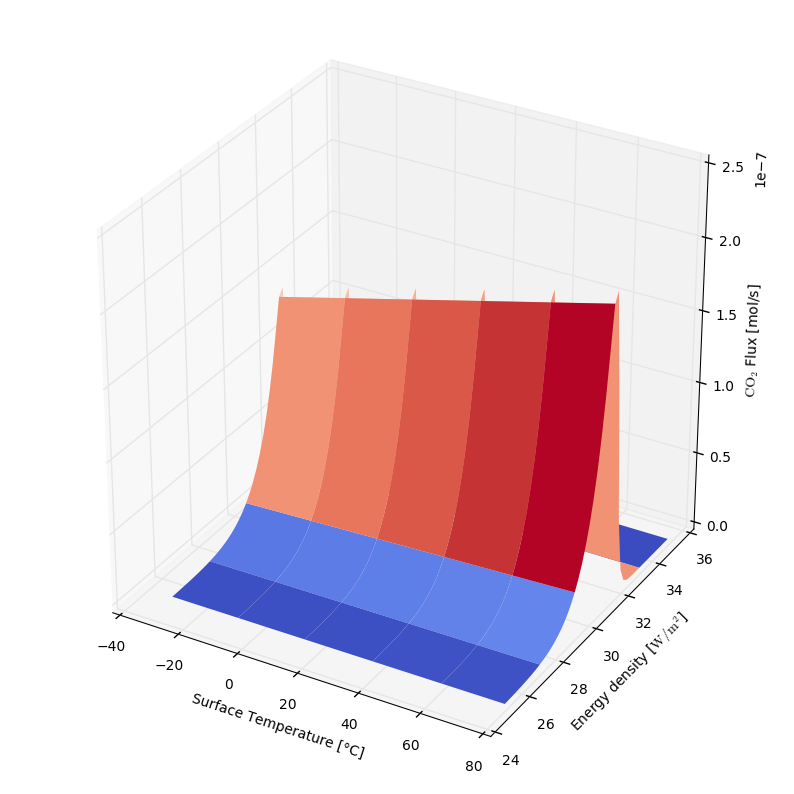

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

# Make data.
x    = temps.copy()
y   = densities.copy()
x, y = np.meshgrid(x, y)

z    = mapFluxes(temps,densities)
np.shape(z)
# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

ax.set_xlabel("Surface Temperature [°C]")
ax.set_ylabel("Energy density [${\\rm W/m}^{2}$]")
#ax.set_ylim(0,30)
ax.set_zlabel("${\\rm CO}_2$ Flux [mol/s]")

#ax.set_zlim(0,5e-5)
#ax.set_zscale('log')

# Customize the z axis.
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### np.shape(y)

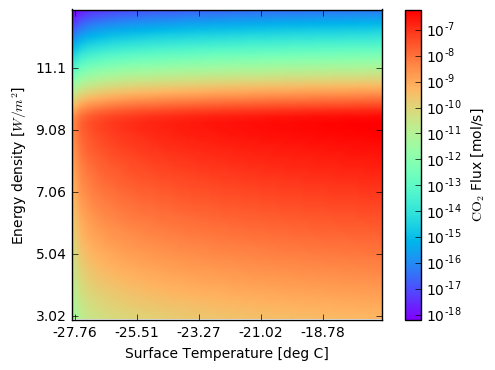

In [22]:
from matplotlib.colors import LogNorm
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure()
ax = fig.add_subplot(111)
res = ax.imshow(fluxes, cmap="rainbow",norm=LogNorm(), origin = 'lower')
ax.set_xlabel("Surface Temperature [deg C]")
ax.set_ylabel("Energy density [$W/m^{2}$]")

xticks = temps.round(decimals=2)
yticks = densities.round(decimals=2)

ax.set_xticklabels(xticks)
ax.set_yticklabels(yticks)

#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.ticklabel_format(style='sci')


cb = fig.colorbar(res)
cb.set_label("${\\rm CO}_{2}$ Flux [mol/s]")